# Stacked Regression Example:
Using _Boston Housing_ dataset as an example for stacked regression.

Need to predict (Regression task) values for _medv_ attribute/feature.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import lightgbm as lgb
import xgboost as xgb

In [2]:
# Read in data-
boston_data = pd.read_csv("train.csv")

In [3]:
# Get dimensions of data-
boston_data.shape

(333, 15)

In [4]:
boston_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
# Delete 'ID' attribute-
boston_data_id = boston_data['ID']
boston_data.drop('ID', axis = 1, inplace=True)

In [6]:
# Get dimensions of data AFTER dropping 'ID' attribute-
boston_data.shape

(333, 14)

In [7]:
# Check for missing value in data-
boston_data.isnull().values.any()

False

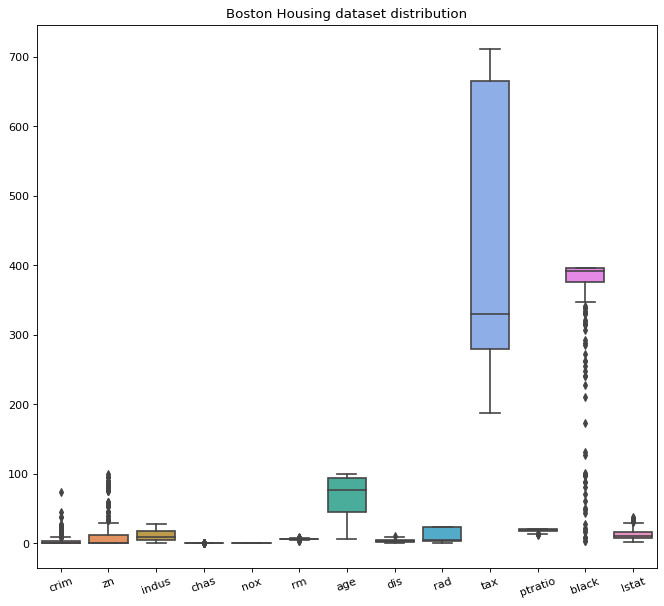

In [9]:
# Visualize distribution of attributes-
fig=plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')

sns.boxplot(data=boston_data.iloc[:, :-1])

plt.title("Boston Housing dataset distribution")
plt.xticks(rotation = 20)
plt.show()

In [10]:
cols = boston_data.columns.tolist()

cols.remove('medv')
cols.remove('age')
cols.remove('tax')

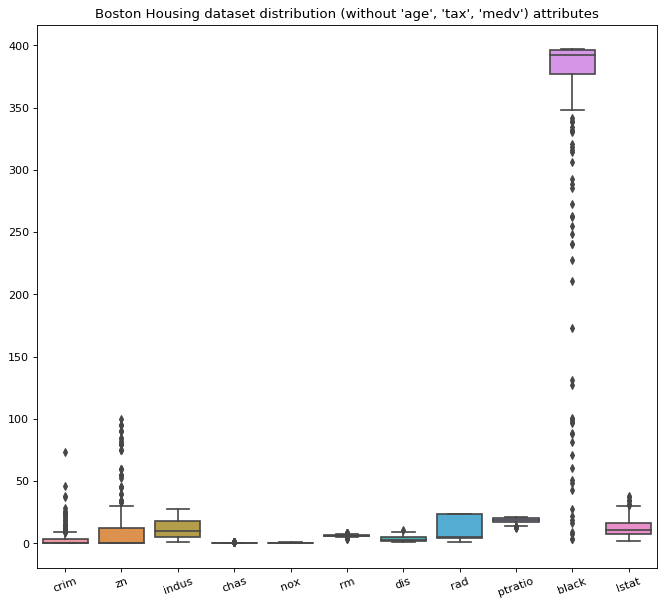

In [11]:
# Visualize distribution of attributes without the 3 attributes from above-
fig=plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')

sns.boxplot(data=boston_data.loc[:, cols])

plt.title("Boston Housing dataset distribution (without 'age', 'tax', 'medv') attributes")
plt.xticks(rotation = 20)
plt.show()

### Observation:
The attributes have a skewed distribution with lots of outliers for some of the attributes!

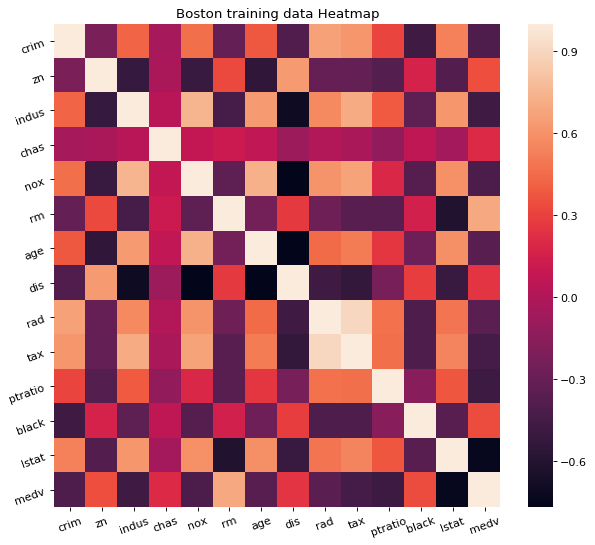

In [23]:
# Create heatmap for training data-

# Calculate correlation matrices-
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')

boston_data_train_corr = boston_data.corr()

# Create heatmap for training data-
sns.heatmap(boston_data_train_corr)

plt.title("Boston training data Heatmap")
plt.xticks(rotation = 20)
plt.yticks(rotation = 20)
plt.show()

In [12]:
# To divide the data into features (X) and labels (y)-

# 'X' contains attributes
X = boston_data.drop('medv', axis = 1)

# X = X.values
# X = X[:,:].astype('float')

# 'y' contains labels
y = boston_data['medv']

In [14]:
# Standardize/Normalize Features-
# std_scaler = StandardScaler()
rb_scaler = RobustScaler()

# X_scaled = std_scaler.fit_transform(X)
X_scaled = rb_scaler.fit_transform(X)

# Convert from numpy.ndarray to Pandas DataFrame-
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# We have NOT scaled/normalized the target attribute 'medv' in 'y'!

In [15]:
# Divide dataset into training and testing sets-
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("\nShape of training and testing sets are:")
print("X_train = {0}, y_train = {1}, X_test = {2} and y_test = {3}\n".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))


Shape of training and testing sets are:
X_train = (233, 13), y_train = (233,), X_test = (100, 13) and y_test = (100,)



In [16]:
# Use a DecisionTree regressor-
dt_reg = DecisionTreeRegressor()

# Train model on training data-
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [17]:
# Make predictions using trained model-
y_pred = dt_reg.predict(X_test)

In [18]:
# Get trained model metrics-
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

print("\nDecision Tree regressor (base model) metrics are:")
print("MAE = {0:.4f}, MSE = {1:.4f} and R2-score = {2:.4f}\n".format(mae, mse, r2s))


Decision Tree regressor (base model) metrics are:
MAE = 2.7130, MSE = 17.2435 and R2-score = 0.7986



In [19]:
# Use 5-fold CV (R2-Scores)-
dt_reg_cv = cross_val_score(DecisionTreeRegressor(), X_train, y_train, cv = 5)

print("\nMetrics for DecisionTree regressor (R2-Score) using 5-fold CV are:")
print("Mean = {0:.4f} and Standard Deviation = {1:.4f}\n".format(dt_reg_cv.mean(), dt_reg_cv.std()))


Metrics for DecisionTree regressor (R2-Score) using 5-fold CV are:
Mean = 0.6912 and Standard Deviation = 0.1011



In [20]:
# Use 5-fold CV (MSE-Scores)-
dt_reg_cv_mse = cross_val_score(DecisionTreeRegressor(), X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
dt_reg_cv_mse = -dt_reg_cv_mse

print("\nMetrics for DecisionTree regressor (MSE) using 5-fold CV are:")
print("Mean = {0:.4f} and Standard Deviation = {1:.4f}\n".format(dt_reg_cv_mse.mean(), dt_reg_cv_mse.std()))


Metrics for DecisionTree regressor (MSE) using 5-fold CV are:
Mean = 28.3467 and Standard Deviation = 13.5363



In [24]:
# Remove attributes which are correlated to target 'medv' attribute-
cols_corr = boston_data.columns.tolist()

In [25]:
cols_corr.remove('medv')
cols_corr.remove('rm')
cols_corr.remove('zn')
cols_corr.remove('black')
cols_corr.remove('dis')
cols_corr.remove('chas')

In [26]:
# Train a new Decision Tree regressor without the correlated attributes-
dt_reg2 = DecisionTreeRegressor()

dt_reg2.fit(X_train.loc[:, cols_corr], y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [27]:
y_pred2 = dt_reg2.predict(X_test.loc[:, cols_corr])

In [28]:
# Get trained model metrics-
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
r2s = r2_score(y_test, y_pred2)

print("\nDecision Tree regressor (without correlated attributes) metrics are:")
print("MAE = {0:.4f}, MSE = {1:.4f} and R2-score = {2:.4f}\n".format(mae, mse, r2s))


Decision Tree regressor (without correlated attributes) metrics are:
MAE = 4.2540, MSE = 45.6872 and R2-score = 0.4665



### Observation:
It's clear from the results that removing correlated attributes with the target attribute does NOT improve the model performance metrics for a Decision Tree regressor!

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression, Ridge

In [30]:
# Instantiate an Elastic Net regressor object-
elnet = ElasticNet()

# Train regressor on training data-
elnet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
# Make predictions using trained model-
y_pred = elnet.predict(X_test)

In [32]:
# Get trained model metrics-
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

print("\nElastic Net regressor (base model) metrics are:")
print("MAE = {0:.4f}, MSE = {1:.4f} and R2-score = {2:.4f}\n".format(mae, mse, r2s))


Elastic Net regressor (base model) metrics are:
MAE = 3.5489, MSE = 28.4528 and R2-score = 0.6677



In [33]:
# Initialize a Linear Regression model-
lr_model = LinearRegression()

# Train model using training data-
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Make predictions using trained model-
y_pred = lr_model.predict(X_test)

In [35]:
# Get trained model metrics-
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

print("\nLinear regression (base model) metrics are:")
print("MAE = {0:.4f}, MSE = {1:.4f} and R2-score = {2:.4f}\n".format(mae, mse, r2s))


Linear regression (base model) metrics are:
MAE = 3.5109, MSE = 30.5067 and R2-score = 0.6438



In [36]:
# Performing 'Ridge Regression'-

print("\n\n\nBrute forcing best score for Ridge Regression using different 'alpha' values.\n\n")

# A dictionary to store alpha as key and ridge regression score as value-
Ridge_Score = {}


for alpha in [x for x in range(10, 180, 10)]:
	lin_ridge_model = Ridge(alpha = alpha)

	lin_ridge_model.fit(X_train, y_train)

	Ridge_Score[alpha] = lin_ridge_model.score(X_test, y_test)

	# print("\nRidge Regression score for alpha = {0} is = {1:.4f}\n".format(alpha, lin_ridge_model.score(X_test, y_test)))





Brute forcing best score for Ridge Regression using different 'alpha' values.




In [37]:
# Get 'alpha' corresponding to minimum ridge regression score-
min_alpha = min(Ridge_Score, key = lambda k: Ridge_Score[k])

print("\n\n'alpha' giving minimum ridge score: {0}, Ridge score: {1:.4f}\n\n".format(min_alpha, Ridge_Score[min_alpha]))



'alpha' giving minimum ridge score: 10, Ridge score: 0.6481




In [38]:
# Using Ridge regression model (alpha value) from above-
lin_rid_reg = Ridge(alpha = min_alpha)

lin_rid_reg.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [39]:
# Make predictions using trained model-
y_pred = lin_rid_reg.predict(X_test)

In [40]:
# Get trained model metrics-
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

print("\nRidge regression metrics are:")
print("MAE = {0:.4f}, MSE = {1:.4f} and R2-score = {2:.4f}\n".format(mae, mse, r2s))


Ridge regression metrics are:
MAE = 3.4978, MSE = 30.1357 and R2-score = 0.6481



In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
# Initialize KNN regressor using manually specified parameters-
knn_reg = KNeighborsRegressor(n_neighbors=6, metric='manhattan', algorithm='auto', weights='distance')

In [44]:
# Train model on training data-
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='distance')

In [45]:
# Make predictions-
y_pred = knn_reg.predict(X_test)

In [46]:
# Get trained model metrics-
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

print("\nKNN regression metrics are:")
print("MAE = {0:.4f}, MSE = {1:.4f} and R2-score = {2:.4f}\n".format(mae, mse, r2s))


KNN regression metrics are:
MAE = 3.8449, MSE = 33.9973 and R2-score = 0.6030



In [47]:
from sklearn import svm

In [48]:
# Initialize a SVM regressor-
svm_reg = svm.SVR(gamma='auto')

# Train model on training data-
svm_reg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
# Make predictions using trained model-
y_pred = svm_reg.predict(X_test)

In [50]:
# Get model metrics using trained model-
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

print("\nSVM regressor (base model) metrics are:")
print("MAE = {0:.4f}, MSE = {1:.4f} and R2-score = {2:.4f}\n".format(mae, mse, r2s))


SVM regressor (base model) metrics are:
MAE = 6.4975, MSE = 85.5894 and R2-score = 0.0005



# Using Stacked Regressors:

In [51]:
# Create base learners-
base_classifiers = [
    ('dt_reg', DecisionTreeRegressor()),
    ('knn_reg', KNeighborsRegressor(n_neighbors=6, metric='manhattan', algorithm='auto', weights='distance')),
    ('ridge_reg', Ridge(alpha = min_alpha))
]

In [55]:
# Initialize sklearn stacking regressor with a meta learner-
stacking_reg = StackingRegressor(
    estimators=base_classifiers,
    final_estimator=RandomForestRegressor(n_estimators = 50)
)


# Train stacked classifiers on training data-
stacking_reg.fit(X_train, y_train)

StackingRegressor(cv=None,
                  estimators=[('dt_reg',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                            

In [57]:
# Get score of trained stacked classifier on testing data-
stacking_reg.score(X_test, y_test)

0.7288550370106612

In [58]:
# Make predictions using stacked regressors-
y_pred_stacked = stacking_reg.predict(X_test)

In [59]:
# Get model metrics using trained model-
mse = mean_squared_error(y_test, y_pred_stacked)
mae = mean_absolute_error(y_test, y_pred_stacked)
r2s = r2_score(y_test, y_pred_stacked)

print("\nStacked regressor metrics are:")
print("MAE = {0:.4f}, MSE = {1:.4f} and R2-score = {2:.4f}\n".format(mae, mse, r2s))


Stacked regressor metrics are:
MAE = 2.8142, MSE = 23.2193 and R2-score = 0.7289



In [67]:
# Initialize sklearn stacking regressor with a meta learner-
stacking_reg = StackingRegressor(
    estimators=base_classifiers,
    final_estimator=lgb.LGBMRegressor()
)


# Train stacked classifiers on training data-
stacking_reg.fit(X_train, y_train)

StackingRegressor(cv=None,
                  estimators=[('dt_reg',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                            

In [62]:
# Make predictions using stacked regressors-
y_pred_stacked = stacking_reg.predict(X_test)

In [63]:
# Get model metrics using trained model-
mse = mean_squared_error(y_test, y_pred_stacked)
mae = mean_absolute_error(y_test, y_pred_stacked)
r2s = r2_score(y_test, y_pred_stacked)

print("\nStacked regressor metrics (using LightGBM as final regressor) are:")
print("MAE = {0:.4f}, MSE = {1:.4f} and R2-score = {2:.4f}\n".format(mae, mse, r2s))


Stacked regressor metrics (using LightGBM as final regressor) are:
MAE = 2.9720, MSE = 22.8730 and R2-score = 0.7329



In [68]:
# Using 5-fold Cross-Validation using stacked regressor from above-
stacked_reg_cv = cross_val_score(stacking_reg, X_train, y_train, cv = 5)

print("\nMetrics for Stacked regressor (using LightGBM regressor) (R2-Score) using 5-fold CV are:")
print("Mean = {0:.4f} and Standard Deviation = {1:.4f}\n".format(stacked_reg_cv.mean(), stacked_reg_cv.std()))


Metrics for Stacked regressor (using LightGBM regressor) (R2-Score) using 5-fold CV are:
Mean = 0.7582 and Standard Deviation = 0.0596



In [70]:
# Use 5-fold CV (MSE-Scores)-
stacked_reg_cv_mse = cross_val_score(stacking_reg, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
stacked_reg_cv_mse = -stacked_reg_cv_mse

print("\nMetrics for Stacked regressor (using LightGBM regressor) (MSE) using 5-fold CV are:")
print("Mean = {0:.4f} and Standard Deviation = {1:.4f}\n".format(stacked_reg_cv_mse.mean(), stacked_reg_cv_mse.std()))


Metrics for Stacked regressor (using LightGBM regressor) (MSE) using 5-fold CV are:
Mean = 18.8763 and Standard Deviation = 10.3543



In [72]:
# Use 5-fold CV (MSE-Scores)-
stacked_reg_cv_mae = cross_val_score(stacking_reg, X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error')
stacked_reg_cv_mae = -stacked_reg_cv_mae

print("\nMetrics for Stacked regressor (using LightGBM regressor) (MAE) using 5-fold CV are:")
print("Mean = {0:.4f} and Standard Deviation = {1:.4f}\n".format(stacked_reg_cv_mse.mean(), stacked_reg_cv_mse.std()))


Metrics for Stacked regressor (using LightGBM regressor) (MAE) using 5-fold CV are:
Mean = 18.8763 and Standard Deviation = 10.3543



### Observation:
The results show that this particular configuration of stacked regressors has high variance for MAE and MSE but, R2-score appears to be fine. It would be interesting to compute the _adjusted R2-score_ as well.

In [64]:
# Initialize sklearn stacking regressor with a meta learner-
stacking_reg = StackingRegressor(
    estimators=base_classifiers,
    final_estimator=xgb.XGBRFRegressor()
)


# Train stacked classifiers on training data-
stacking_reg.fit(X_train, y_train)

[12:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(cv=None,
                  estimators=[('dt_reg',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                            

In [65]:
# Make predictions using stacked regressors-
y_pred_stacked = stacking_reg.predict(X_test)

In [66]:
# Get model metrics using trained model-
mse = mean_squared_error(y_test, y_pred_stacked)
mae = mean_absolute_error(y_test, y_pred_stacked)
r2s = r2_score(y_test, y_pred_stacked)

print("\nStacked regressor metrics (using XGBoost as final regressor) are:")
print("MAE = {0:.4f}, MSE = {1:.4f} and R2-score = {2:.4f}\n".format(mae, mse, r2s))


Stacked regressor metrics (using XGBoost as final regressor) are:
MAE = 2.8921, MSE = 25.3401 and R2-score = 0.7041



## Takeaways:

1. The _single layer_ stacked regressor which has performed 'best' so far happens to be LightGBM regressor
1. Maybe adding more layers to the stacked regressor might improve the performance
1. Some other combinations of regressors coupled with hyper-parameter tuning can improve the performance further